In [124]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df = pd.read_excel(f'./230814_v2.xlsx')
#기존 데이터와 합치고 훈련데이터 등 분리
X = df.iloc[:,0:40]
y = df.iloc[:,40]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
df.isnull().sum().sort_values(ascending = False).head(40)

1hr 강수량     0
자치구_구로구     0
자치구_노원구     0
자치구_도봉구     0
자치구_동대문구    0
자치구_동작구     0
자치구_마포구     0
자치구_서대문구    0
자치구_서초구     0
자치구_성동구     0
자치구_성북구     0
자치구_송파구     0
자치구_양천구     0
자치구_영등포구    0
자치구_용산구     0
자치구_은평구     0
자치구_종로구     0
자치구_중구      0
자치구_중랑구     0
자치구_금천구     0
자치구_광진구     0
일평균 강수량     0
자치구_관악구     0
경사          0
고도          0
불투수면        0
녹지          0
하천          0
복개하천        0
맨홀          0
빗물받이        0
빗물펌프        0
교통사고        0
Year        0
Month       0
Day         0
자치구_강남구     0
자치구_강동구     0
자치구_강북구     0
자치구_강서구     0
dtype: int64

In [125]:
#변수 간 상관관계
df_corr = df.corr()

In [126]:
df_corr_sort = df_corr.sort_values('하수수위', ascending = False)
df_corr_sort['하수수위'].head(30)

하수수위        1.000000
1hr 강수량     0.114921
빗물펌프        0.110345
일평균 강수량     0.100047
자치구_광진구     0.097623
자치구_강서구     0.095227
자치구_강남구     0.093212
Year        0.078476
맨홀          0.065325
자치구_노원구     0.062051
빗물받이        0.053844
교통사고        0.052193
하천          0.045385
녹지          0.042581
자치구_중랑구     0.032731
자치구_마포구     0.021244
Month       0.015647
자치구_동대문구    0.013700
자치구_성동구     0.009846
불투수면        0.008086
자치구_성북구     0.006164
Day         0.000223
자치구_영등포구   -0.004260
자치구_동작구    -0.009915
자치구_서대문구   -0.014811
자치구_도봉구    -0.015751
자치구_강동구    -0.019137
자치구_서초구    -0.022259
자치구_금천구    -0.022650
자치구_양천구    -0.026033
Name: 하수수위, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:

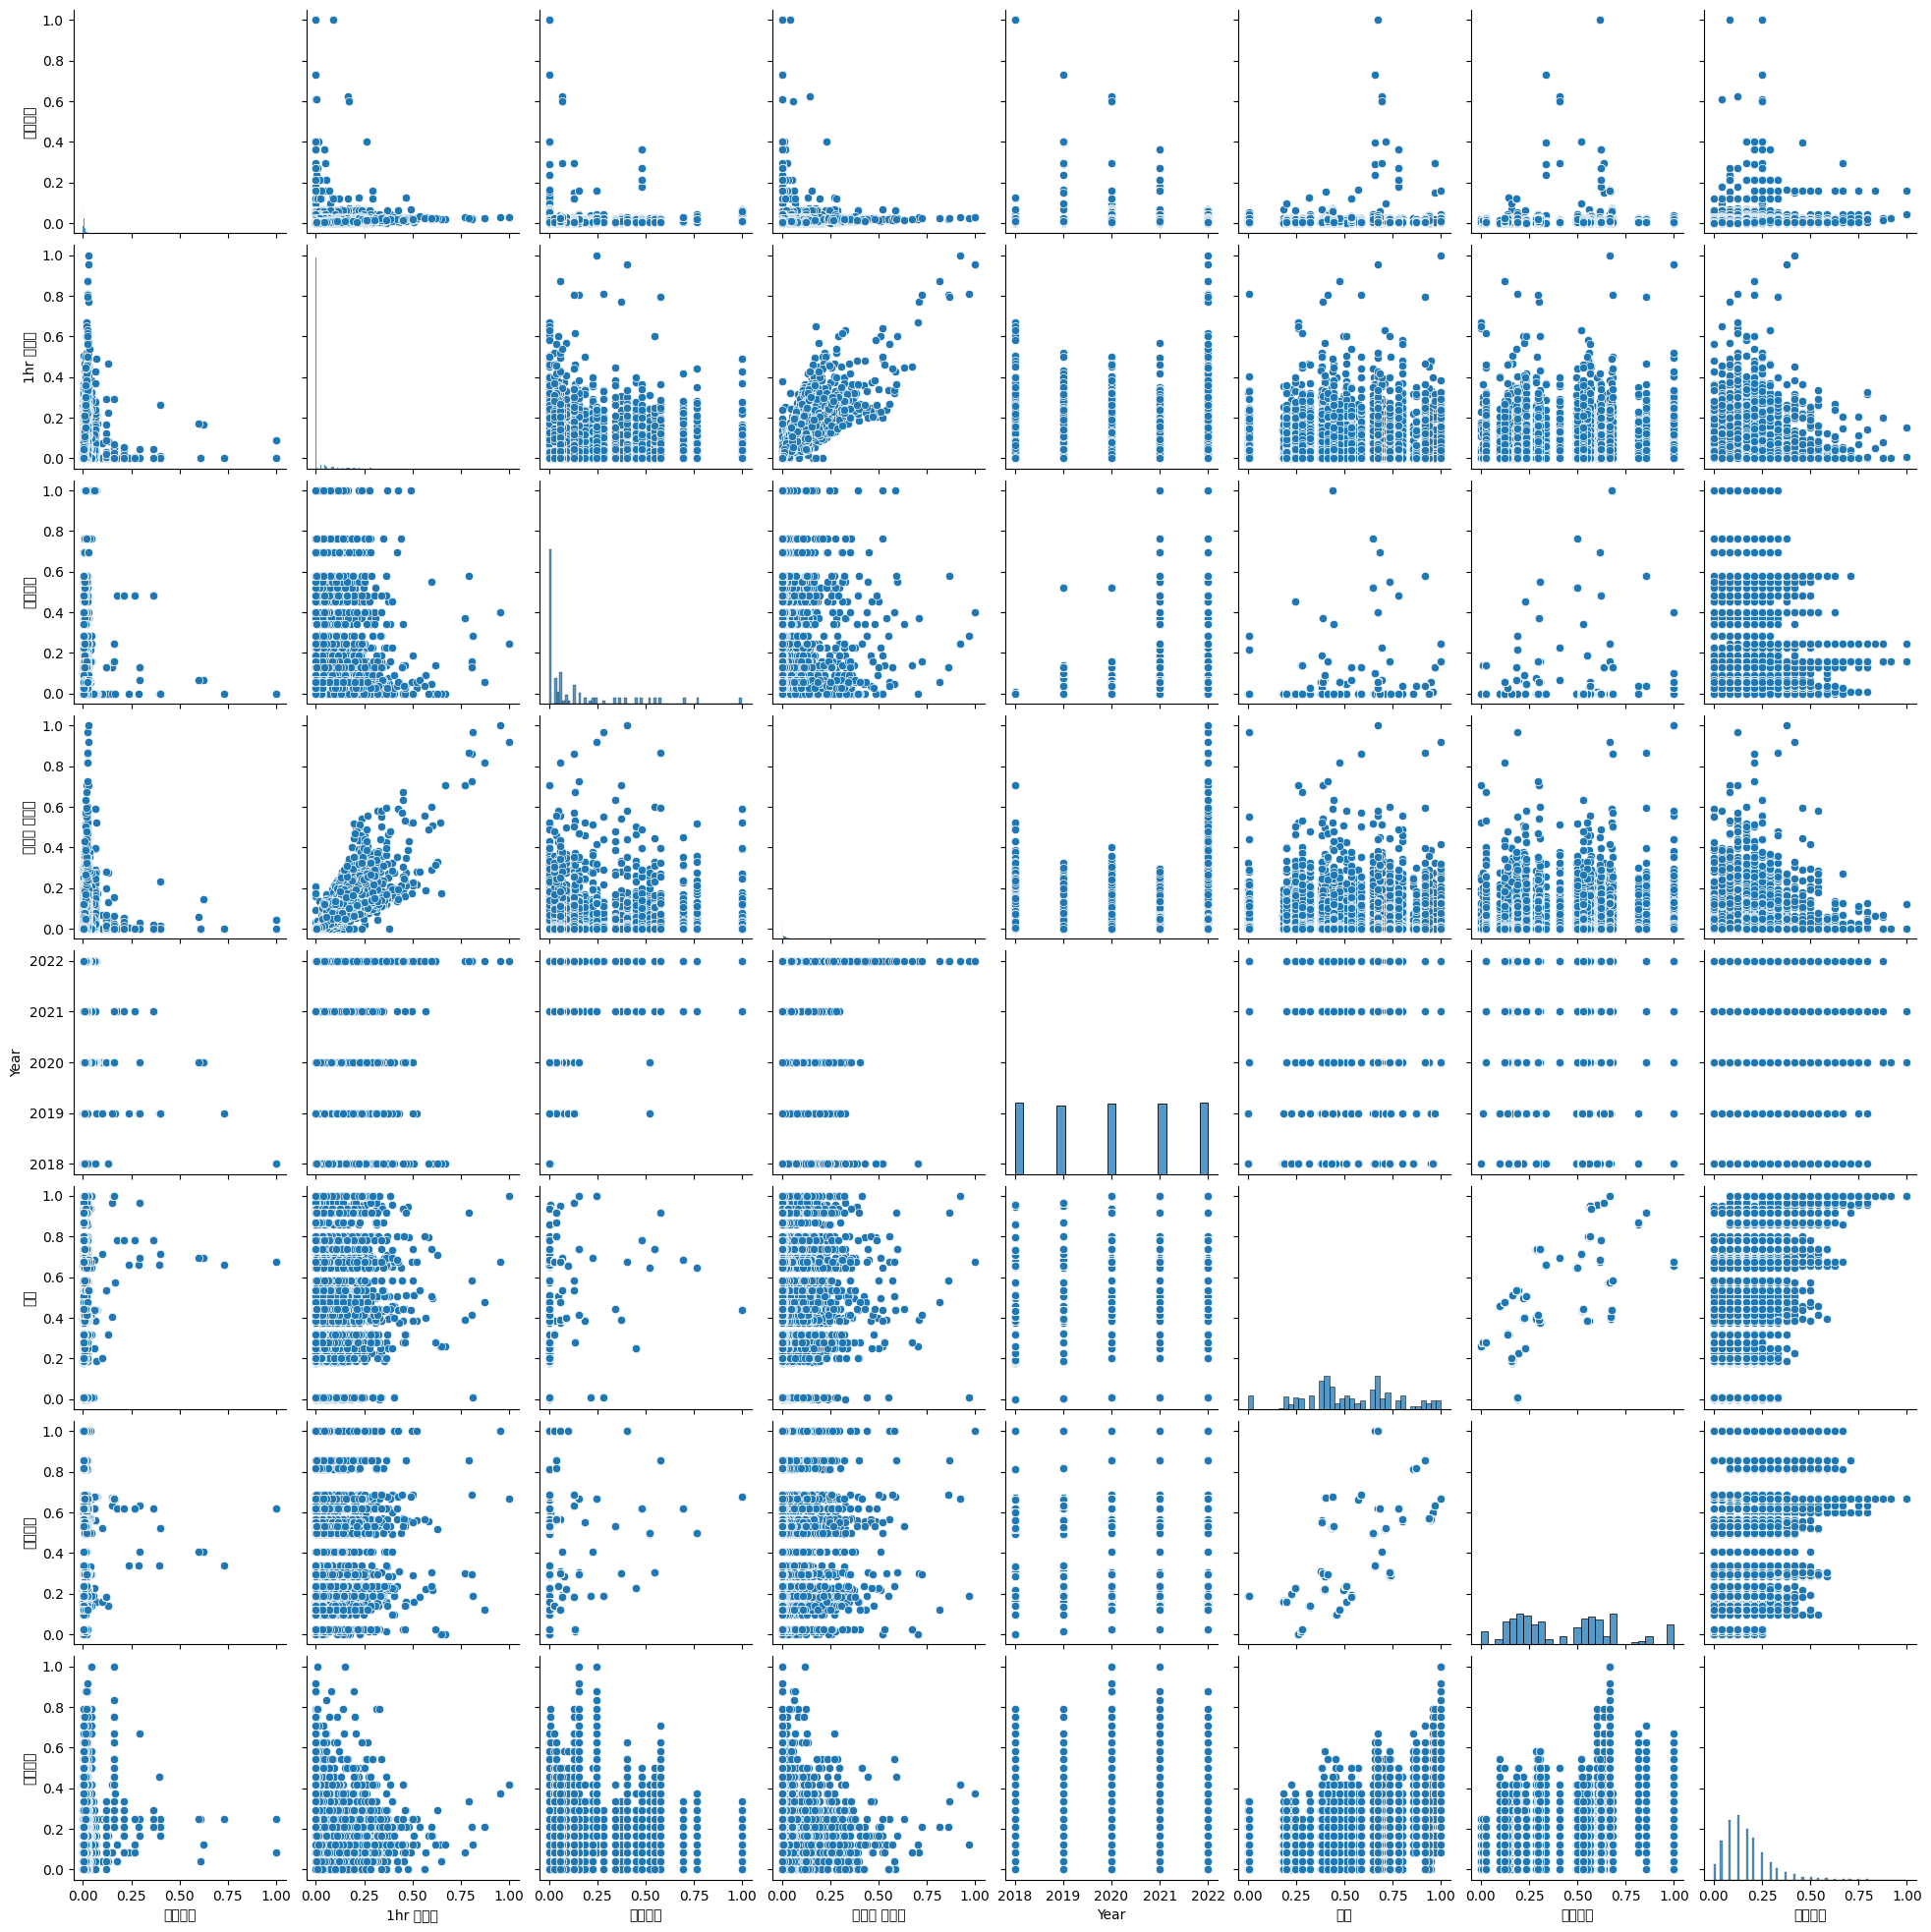

In [127]:
import seaborn as sns
#관련 있는 9개 변수 나열
cols = ['하수수위','1hr 강수량','빗물펌프', '일평균 강수량','Year','맨홀','빗물받이', '교통사고']
sns.pairplot(df[cols])
plt.show()

In [109]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Malgun' in i.name:
        print(i.name, i.fname)

import platform
1
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    sns.set(font = 'Malgun Gothic', rc = {'font.family':font_name})
else:
    print('Unknown system... sorry')

Unknown system... sorry


In [142]:
#관련도 높은 변수만 모아서 모델 학습 시작
cols_train = ['1hr 강수량','빗물펌프', '일평균 강수량','Year','맨홀','빗물받이', '교통사고']
X_train_pre = df[cols_train]
y = df['하수수위'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)


In [149]:
#모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim = 7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                400       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [150]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam', loss = 'mean_squared_error')
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

modelpath = "./flooding.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size =32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
213/213 [==============================] - 1s 2ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 2/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 3/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 4/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 5/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 6/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 7/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 8/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 9/2000
213/213 [==============================] - 0s 1ms/step - loss: 9.2732e-04 - val_loss: 7.1335e-04
Epoch 10/2

In [151]:
#모델의 정확도는 89.9%정도됨
print('Accuracy:'%(model.evaluate(X,y)[1]))
print('loss: '%(model.evaluate(X,y)[0]))

InvalidArgumentError: ignored

In [152]:
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

71/71 [==============================] - 0s 787us/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.00
실제 침수: 0.16, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 

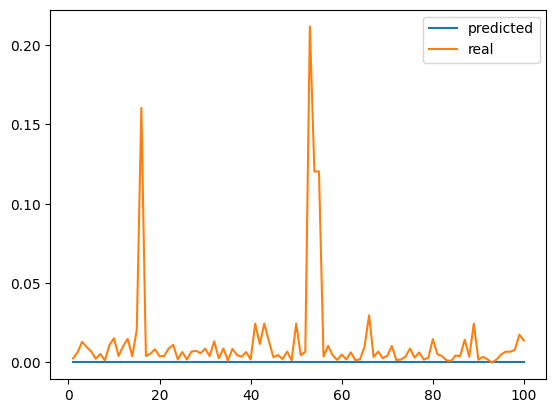

In [153]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

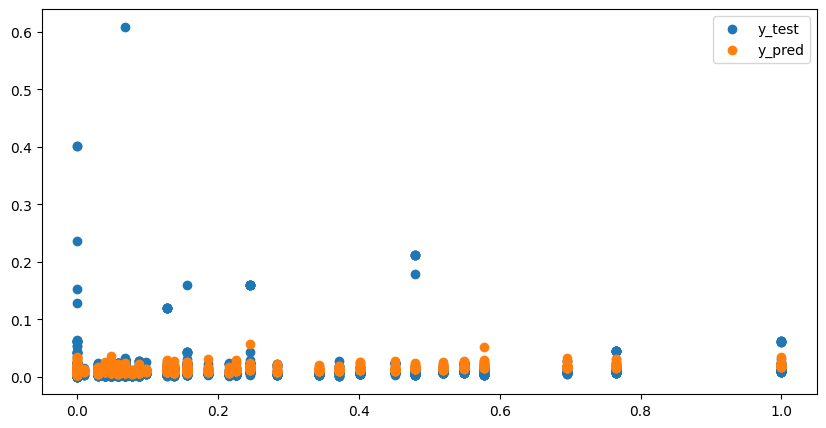

In [154]:
#선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)

plt.figure(figsize = (10,5))
plt.scatter(X_test['빗물펌프'], y_test, label = 'y_test')
plt.scatter(X_test['빗물펌프'], y_test_pred, label = 'y_pred')
plt.legend()
plt.show

In [158]:
#RandomForestRegressor, DecisionTreeRegressor, DecisionTreeClassifier의 hyparameter를 일부 조절하며 5개의 모델을 생성해 학습
# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model100 = RandomForestRegressor(n_estimators=100, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

# DecisionTreeClassifier 모델 활용
import sklearn
from sklearn.tree import DecisionTreeClassifier


model_dtc = DecisionTreeClassifier(random_state=0)
model_dtr = DecisionTreeRegressor()

In [162]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

#model_dtc.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [163]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

#ypred4 = model_dtc.predict(X_test)
ypred5 = model_dtr.predict(X_test)

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.16, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.

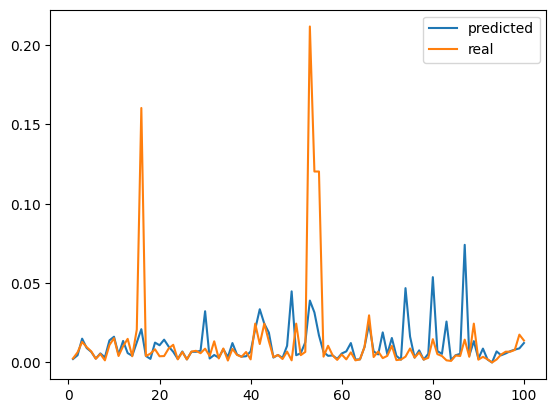

In [170]:
#ypred 1
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 2ms/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.16, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.

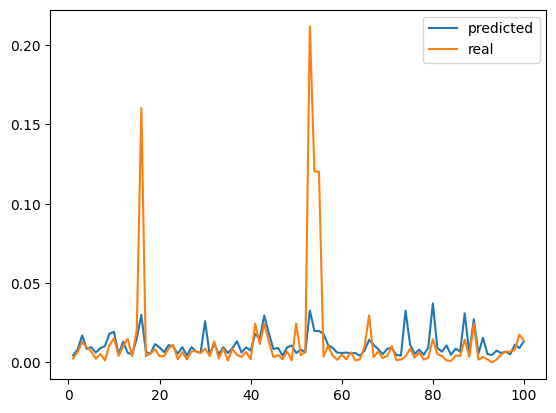

In [171]:
#ypred2
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred2 = model100_5.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred2[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 2ms/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.16, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.

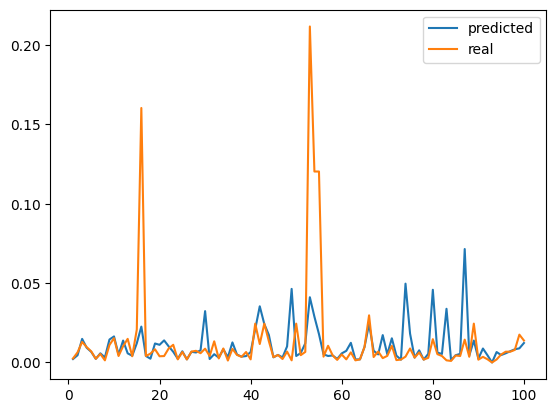

In [174]:
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred3 = model200.predict(X_test)
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred3[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.16, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.

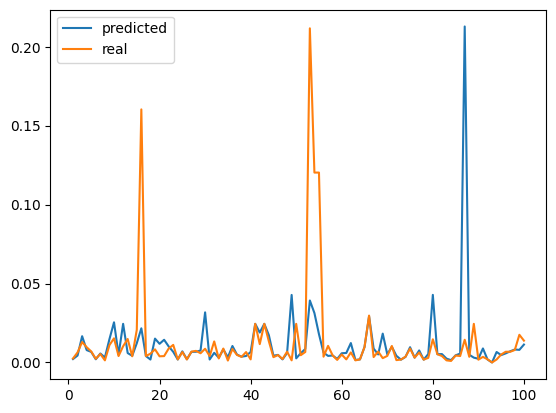

In [175]:
#ypred5 decision tree regression 결정 트리 회귀
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred5 = model_dtr.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  ypred1 = model100.predict(X_test)
  prediction = ypred5[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()